# Photon correlation spectroscopy development
### M. L. Whittaker 
### 26 June 2025

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import PowerTransformer

import pct

In [2]:
path1 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/CMI/Data/PCT/JM_F0/25C'

In [3]:
data = pd.read_csv(path1 + '/JM_F0_25C_MAPCS_v2.csv', skiprows=3)

In [34]:
data.columns

Index(['Identifier', 'Name', 'Description', 'Mean hydrodynamic radius [nm]',
       'Scaled count rate [kHz/mW]', 'Temperature set point [°C]',
       'Sample name', 'Mass concentration [g/ml]', 'Correlation type',
       'Material', 'Refractive index increment', 'Solvent', 'Duration [s]',
       'Scattering angle [deg]', 'Number of repetitions'],
      dtype='object')

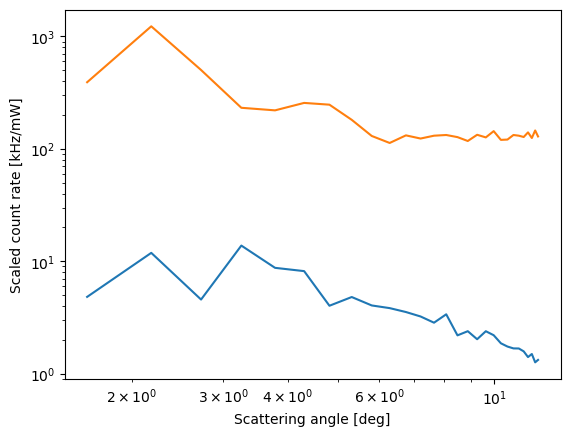

In [54]:
subset1 = data[0::3].sort_values('Scattering angle [deg]')
subset2 = data[1::3].sort_values('Scattering angle [deg]')
plt.plot(4 * np.pi * np.sin(np.deg2rad(subset1['Scattering angle [deg]'])/2), subset1['Scaled count rate [kHz/mW]'])
plt.plot(4 * np.pi * np.sin(np.deg2rad(subset2['Scattering angle [deg]'])/2), subset2['Scaled count rate [kHz/mW]'])
plt.xlabel('Scattering angle [deg]')
plt.xscale('log')
plt.ylabel('Scaled count rate [kHz/mW]')
plt.yscale('log')
plt.show()

In [56]:
path2 = '/Users/mwhittaker/Library/CloudStorage/GoogleDrive-mwhittaker@lbl.gov/My Drive/CMI/Data/PCT/JM_F0/25C/Measurement 1/Repetition 0/Count Trace.csv'

In [60]:
data = pd.read_csv(path2, skiprows=2)

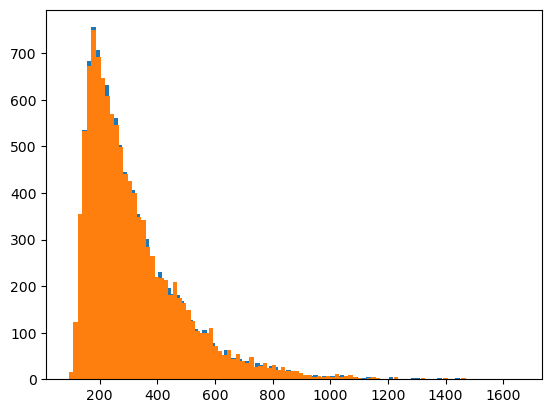

In [67]:
plt.hist(data['CR CHA [kHz]'], bins=100)
plt.hist(data['CR CHB [kHz]'], bins=100); plt.show()

In [206]:
data = data[['CR CHA [kHz]', 'CR CHB [kHz]']].values

In [207]:
power = PowerTransformer(method='yeo-johnson', standardize=False)
tdata = power.fit_transform(data)

In [208]:
power.lambdas_

array([-0.4224083 , -0.40389986])

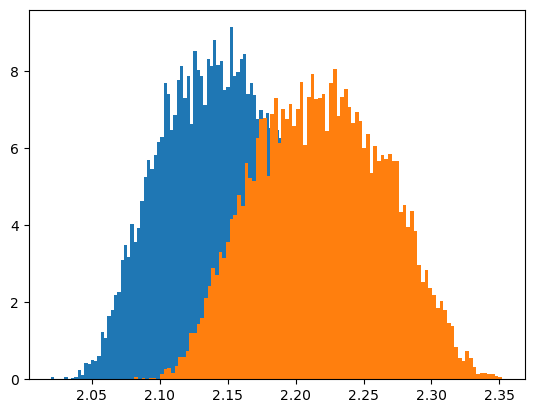

In [210]:
plt.hist(tdata[:,0], bins=100, density=True)
plt.hist(tdata[:,1], bins=100, density=True); plt.show()

In [229]:
for i in range(3):
    gmm = GaussianMixture(random_state=42, n_components=i+1)
    gmm_data = gmm.fit(tdata[:,0].reshape(-1,1))
    print(f'bic_{i+1}: {gmm_data.bic(tdata[:,0].reshape(-1,1))}')
    print(f'aic_{i+1}: {gmm_data.aic(tdata[:,0].reshape(-1,1))}')

bic_1: -39910.40749749967
aic_1: -39925.09636571258
bic_2: -40254.44140484539
aic_2: -40291.16357537767
bic_3: -40250.6041684578
aic_3: -40309.35964130946


In [222]:
print(gmm_data.means_)
print(gmm_data.covariances_)

[[2.14615059]
 [2.19229472]
 [2.0999105 ]]
[[[0.00038892]]

 [[0.00049552]]

 [[0.00046647]]]


In [226]:
power.inverse_transform(gmm_data.means_)

ValueError: X has 1 features, but PowerTransformer is expecting 2 features as input.

In [175]:
gmm_data.covariances_

array([[[0.00038892]],

       [[0.00049552]],

       [[0.00046647]]])

In [218]:
gmm_data.means_ + np.sqrt(gmm_data.covariances_[:,0].reshape(-1,1))

array([[2.18715984]])

In [216]:
power.inverse_transform(gmm_data.means_ + np.sqrt(gmm_data.covariances_[:,0].reshape(-1,1)))

ValueError: X has 1 features, but PowerTransformer is expecting 2 features as input.

In [3]:
pct1 = pct.Dataloader(path1)
data = pct1.load()

In [14]:
data.experiments['Measurement 2']['measurements'][0]['summary']

,Identifier,Start date,Duration [s],Temperature [K],Temperature set point [°C],Best cumulant Order,Hydrodynamic radius [nm] - Value,Hydrodynamic radius [nm] - Coefficient of variation,Hydrodynamic radius [nm] - Standard deviation,Best cumulant Decay factor,...,Accumulated counts,Count rate [kHz],Scaled count rate [kHz/mW],Intercept,Laser intensity [mW],Scattering angle [deg],Scattering vector [1/nm],Solvent,Solvent refractive index,Solvent viscosity [mPas]
0,9c8e52fe-0ffc-44ed-b29c-09f8538957b9,6/10/2025 12:48:35 AM,00:10:00,298.1637,25,3,570.77145,1.133621,607.70973,0.7,...,17843.36217,340.335124,129.00055,0.895786,1.3188,150,2.530958e+07,Water,1.330282,0.890192
